<a href="https://colab.research.google.com/github/ahrarbinaslam/Heart-Disease-Prediction-using-Logistic-Regression/blob/main/Heart_Disease_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Loading the Dataset

In [ ]:
data=pd.read_csv("Heart Disease Dataset.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Analysis

In [ ]:
data.drop(columns = 'education', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [ ]:
data.shape

(4238, 15)

In [ ]:
data.isna().sum().sort_values(ascending=False)

,0
glucose,388
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
age,0
currentSmoker,0
prevalentStroke,0


# Data Visualization

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

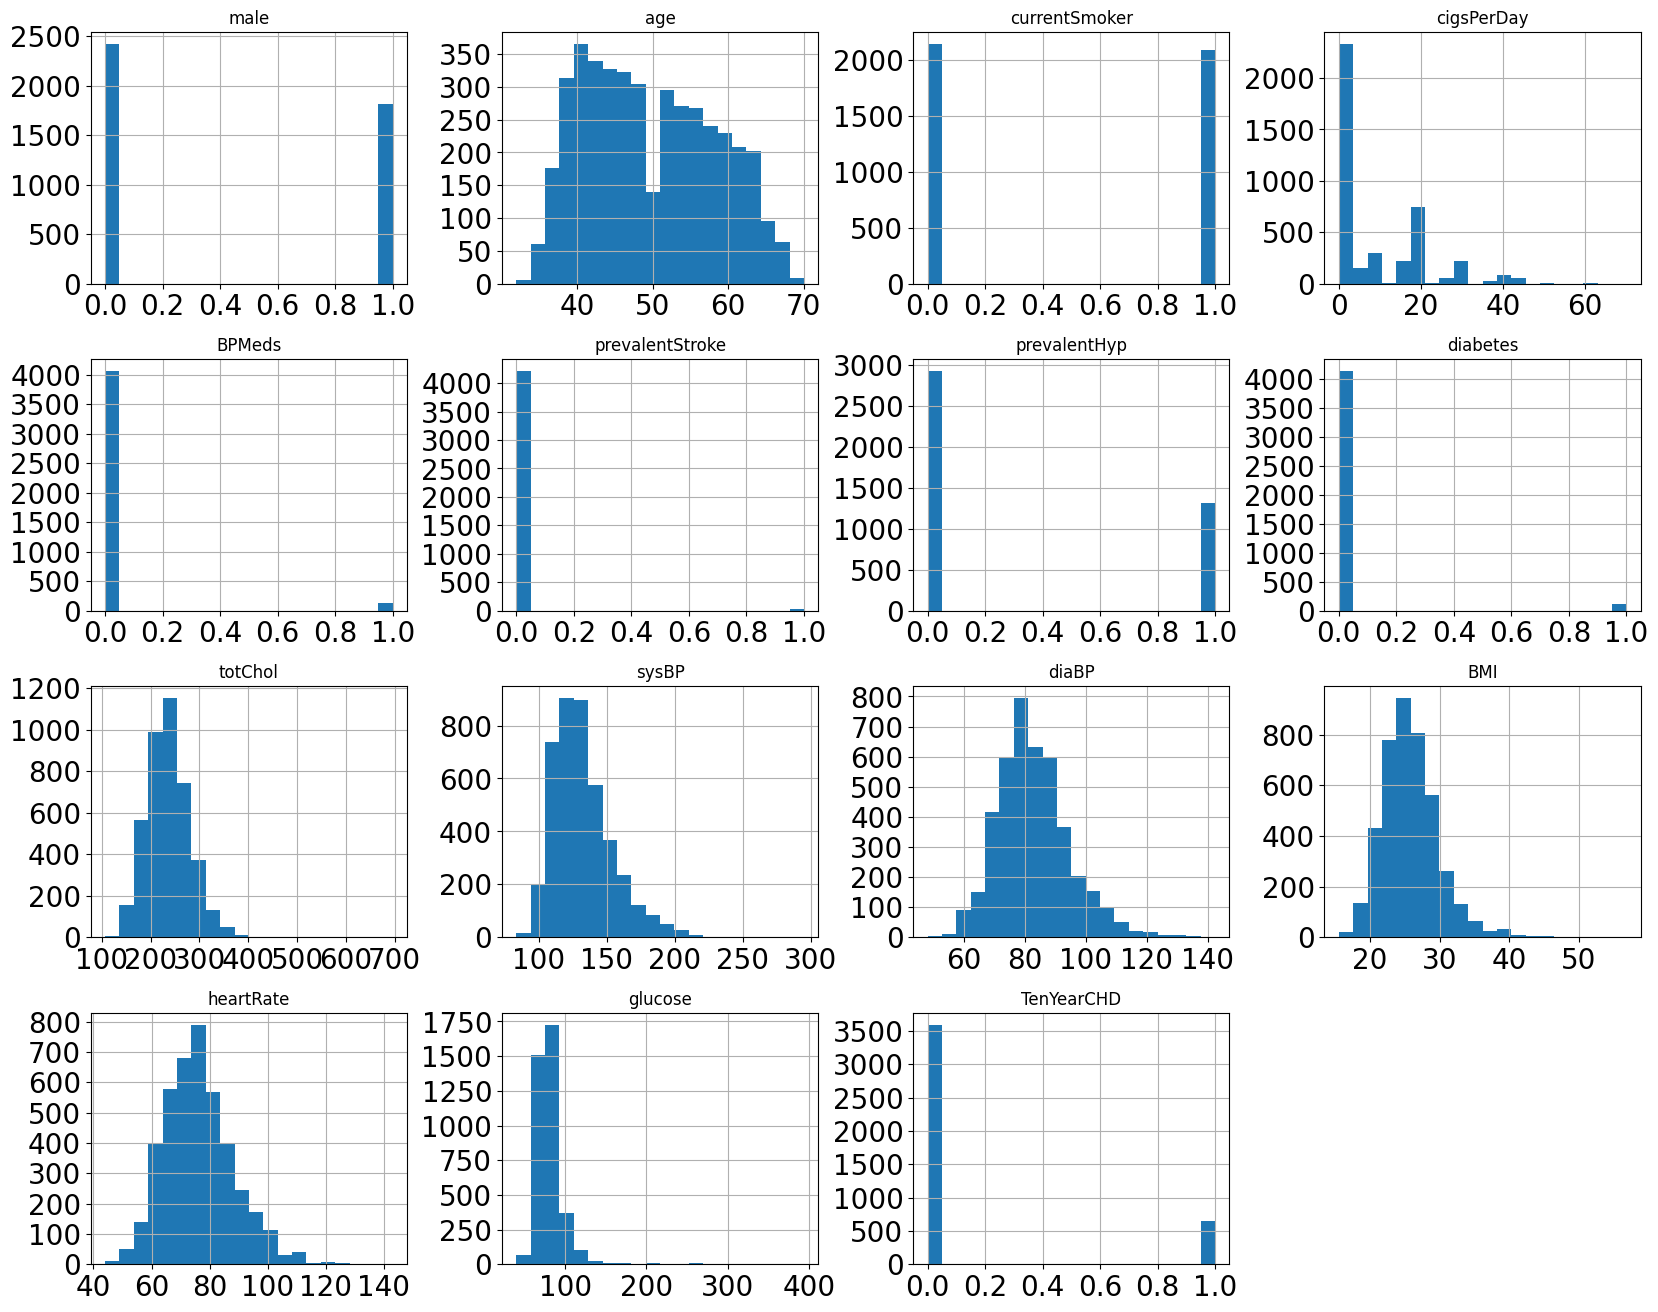

In [ ]:
data.hist(figsize=(20,16), bins=20, xlabelsize=20, ylabelsize=20)

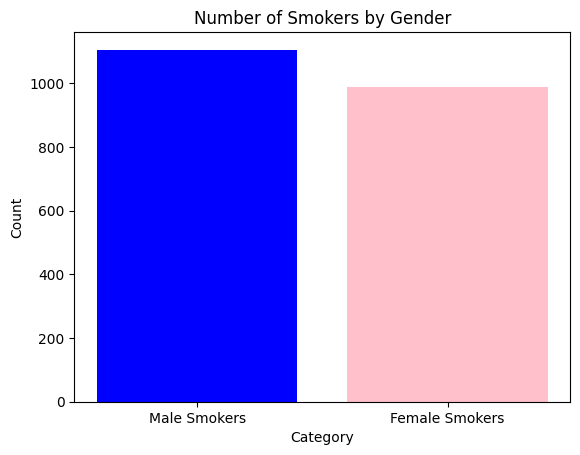

In [ ]:
male_smokers_count= data[(data["male"]==1) & (data["currentSmoker"]==1)].shape[0]
female_smokers_count= data[(data["male"]==0) & (data["currentSmoker"]==1)].shape[0]
categories = ['Male Smokers', 'Female Smokers']
counts = [male_smokers_count, female_smokers_count]
plt.bar(categories, counts, color=['blue', 'pink'])
plt.title('Number of Smokers by Gender')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

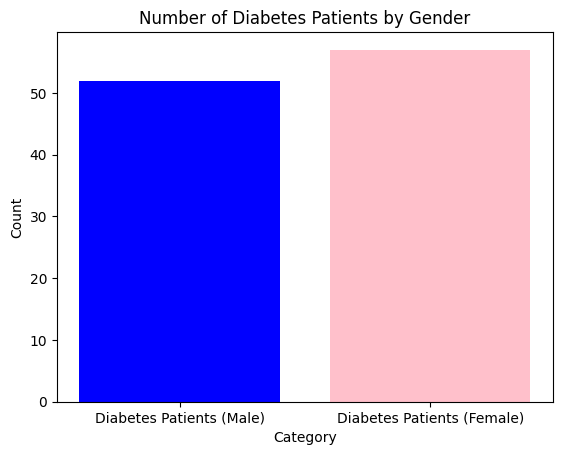

In [ ]:
male_diabetes_count= data[(data["male"]==1) & (data["diabetes"]==1)].shape[0]
female_diabetes_count= data[(data["male"]==0) & (data["diabetes"]==1)].shape[0]
categories1 = ['Diabetes Patients (Male)', 'Diabetes Patients (Female)']
counts1 = [male_diabetes_count, female_diabetes_count]
plt.bar(categories1, counts1, color=['blue', 'pink'])
plt.title('Number of Diabetes Patients by Gender')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

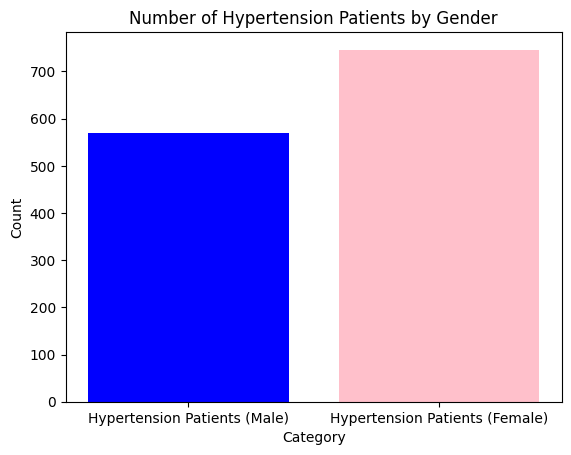

In [ ]:
male_hypertension_count= data[(data["male"]==1) & (data["prevalentHyp"]==1)].shape[0]
female_hypertension_count= data[(data["male"]==0) & (data["prevalentHyp"]==1)].shape[0]
categories2 = ['Hypertension Patients (Male)', 'Hypertension Patients (Female)']
counts2 = [male_hypertension_count, female_hypertension_count]
plt.bar(categories2, counts2, color=['blue', 'pink'])
plt.title('Number of Hypertension Patients by Gender')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

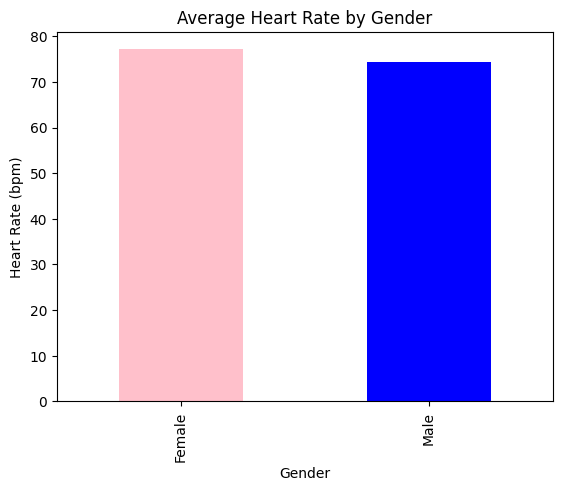

In [ ]:
average_heartrate = data.groupby('male')['heartRate'].mean()
average_heartrate.index = ['Female', 'Male']
average_heartrate.plot(kind='bar', color=['pink', 'blue'], title='Average Heart Rate by Gender', ylabel='Heart Rate (bpm)')
plt.xlabel('Gender')
plt.show()

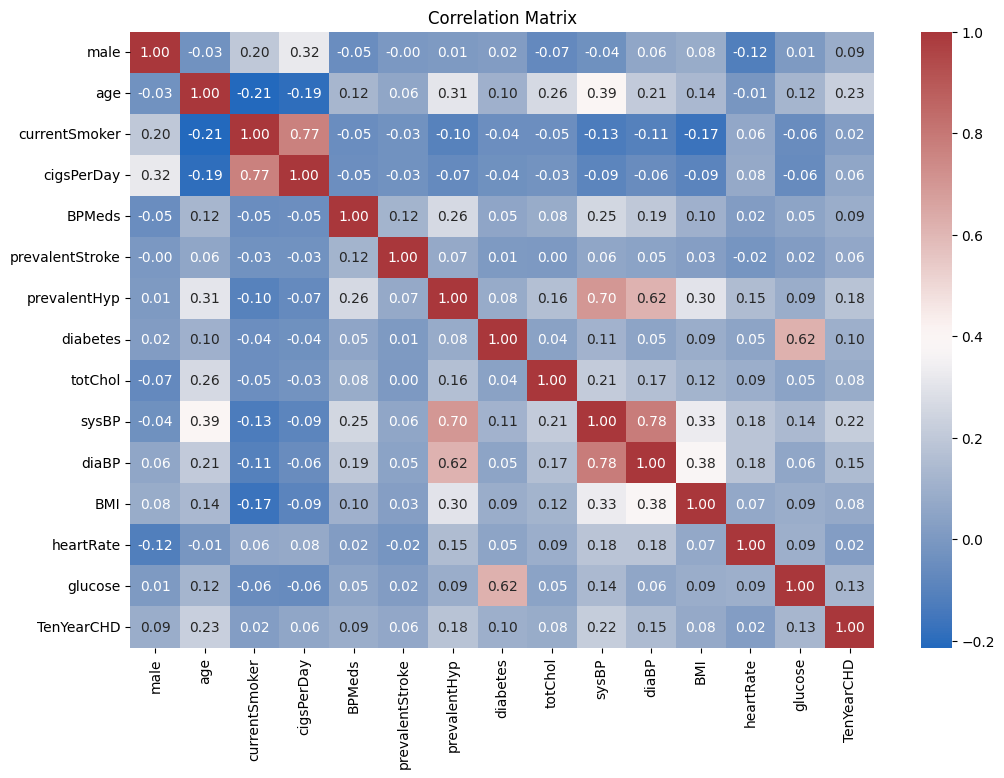

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Machine Learning Model Creation

In [ ]:
features=data.drop("TenYearCHD", axis=1)
target=data["TenYearCHD"]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
len(X_train),len(y_train)

(3390, 3390)

In [ ]:
len(X_test),len(y_test)

(848, 848)

In [ ]:
model = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),LogisticRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_predicted=model.predict(X_test)
model_accuracy=accuracy_score(y_test, y_predicted)
print(model_accuracy)

0.8573113207547169


# Model Evaluation

In [ ]:
model_accuracy=accuracy_score(y_test, y_predicted)
precision=precision_score(y_test, y_predicted)
recall=recall_score(y_test, y_predicted)
F1score=f1_score(y_test,y_predicted)
print(model_accuracy)
print(precision)
print(recall)
print(F1score)

0.8573113207547169
0.6
0.07258064516129033
0.12949640287769784


In [ ]:
print(classification_report(y_test , y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



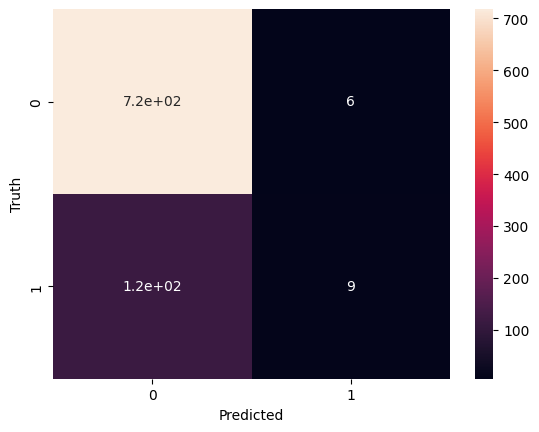

In [ ]:
cm1=confusion_matrix(y_test, y_predicted)
sns.heatmap(cm1, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()